- title: Занятие 9
- author: Kononov Dmitry
- date: 2022-12-5
- category: python
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10106
- test_comment: Задание №6
- slug: lab9
- ipynb_url: download/lab9.ipynb

# Практическое занятие 9: динамическое программирование (продолжение) 
## Цель: Получить практический навык реализации популярных алгоритмов динамического программирования на языке **Python**
## Задачи:
1. Алгоритм поиска расстояния Левенштейна
2. Z-функция строки. Z-алгоритм.
3. Пи-функция строки. Алгоритм Кнута-Морриса-Пратта

## 1. Алгоритм поиска расстояния Левенштейна
Число различий между двумя строками, то есть количество соответствующих символов в последовательностях, которые различаются, называется **расстоянием Хемминга** между строками. 

**Расстояние Хемминга** (определено только для строк равной длины) - это количество символов, которые нужно изменить в одной строке, чтобы получить другую строку, то есть это мера «близости» двух строк.

Если разрешать не только менять символы, но также удалять и вставлять символы, то минимальное количество изменений (замена символа, удаление символа, вставка символа), которое необходимо сделать с одной строкой, чтобы получить другую строку, называется **расстоянием Левенштейна** (в честь российского математика Владимира Левенштейна) или **расстоянием редактирования**. 

Такое расстояние появляется, например, в системах автоматической проверки орфографии. Если при наборе текста человек допустил одну или несколько ошибок, то набранное им слово будет отсутствовать в словаре. При этом нужно понять, какое слово наборщик имел в виду. Если считать, что наиболее типичные ошибки при наборе текста - это пропуск символа, вставка лишнего символа или замена одного символа на другой, то необходимо неправильное слово заменить на слово из словаря с минимальным расстоянием Левенштейна.

Рассмотрим алгоритм вычисления расстояния Левенштейна между двумя словами `A` и `B`. Определим `F(i, j)` как расстояние редактирования между префиксами данных строк $A' = A[:i]$ и $B' = B[:j]$. Рассмотрим последние символы этих префиксов $a_{i-1}$ и $b_{j-1}$. Посмотрим, как префикс $B' = B[:j]$ мог быть получен из префикcа $A' = A[:i]$ при помощи разрешенных операций редактирования. Здесь возможны следующие варианты:
1. Если последние символы префиксов совпадают ($a_{i-1} = b_{j-1}$), то в этом случае можно не менять эти последние символы. Тогда $F(i, j) = F(i-1, j-1)$.
2. Если $a_{i-1} \neq b_{j-1}$, то тогда можно потратить 1 операцию на замену символа $a_{i-1}$ на $b_{j-1}$ и также потратить  $F(i-1, j-1)$ операцию на превращение префикса $A[:i-1]$ в $B[:j-1]$. Тогда $F(i, j) = F(i-1, j-1) + 1$.
3. Символ $a_{i-1}$ был удален при редактировании, тогда необходимо префикс $A[:i-1]$ превратить в $B[:j]$, на что необходимо $F(i-1, j)$ операций редактирования. В этом случае $F(i, j) = F(i-1, j) + 1$.
4. Символ $b_{j-1}$ был добавлен при редактировании, тогда необходимо префикс $A[:i]$ превратить в $B[:j-1]$, на что необходимо $F(i, j-1)$  операций редактирования. В этом случае $F(i, j) = F(i, j-1) + 1$.
Далее при вычислении $F(i, j)$ необходимо взять минимум из всех перечисленных возможностей.

Начальные значения: $F(i, 0) = i$, $F(0, j) = j$.

Рисунок ниже иллюстрирует применение рассмотренного алгоритма для расчета расстояния редактирования при преобразовании строки `A = "КАТОК"` в строку `B = "КАРТОН"`. Стрелочки показывают какая из возможностей была выбрана на каждом шаге алгоритма при вычислении минимального расстояния редактирования. В итоге, строка `A` преобразовывается в строку `B` за два шага:
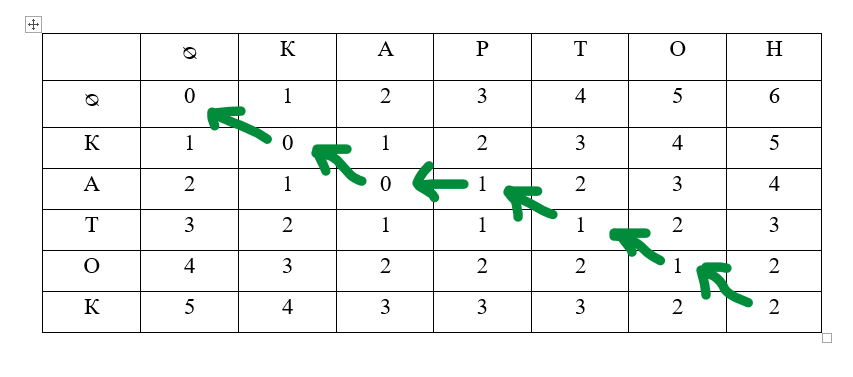

**Задача 1 — напишите функцию, возвращающую расстояние Левенштейна для строк A и B:**

In [35]:
from pprint import pprint

In [36]:
def levin(a, b):
    m = [[None] * (len(a) + 1) for _ in range(len(b) + 1)]
    m[0] = [i for i in range(0, len(a) + 1)]
    for i in range(0, len(b) + 1):
        m[i][0] = i
    
    for i in range(1, len(b) + 1):
        for j in range(1, len(a) + 1):
            m[i][j] = min(
                m[i - 1][j] + 1,
                m[i][j - 1] + 1,
                m[i - 1][j - 1] + (0 if b[i - 1] == a[j - 1] else 1),
            )

    return m[len(b)][len(a)]



In [37]:
levin("КАТОК", "КАРТОН")

[[0, 1, 2, 3, 4, 5],
 [1, 0, 1, 2, 3, 4],
 [2, 1, 0, 1, 2, 3],
 [3, 2, 1, 1, 2, 3],
 [4, 3, 2, 1, 2, 3],
 [5, 4, 3, 2, 1, 2],
 [6, 5, 4, 3, 2, 2]]


2

## 2. Z-функция строки. Z-алгоритм
### Z-функция
Материал позаимствован с сайта [e-maxx.ru](https://e-maxx.ru/algo/z_function).

Здесь и далее строки индексируются с нуля, т.е. первый символ строки имеет номер 0. Также, здесь и далее `s[i…j]` обозначает подстроку строки *s* от i-го символа до j-го включительно.

Пусть дана строка *s* длины n. Тогда `Z(s)` - это массив длины n, i-ый элемент которого равен наибольшему числу символов, начиная с позиции i, совпадающих с первыми символами строки *s*.

Иными словами, `z[i]` — это длина наибольшего общего префикса строки s и её i-го суффикса.

Первый элемент Z-функции, `z[0]`, обычно считают неопределённым. Мы будем считать, что он равен нулю.

Далее будет привиден алгоритм вычисления Z-функции за время O(n).

#### Примеры
Приведём для примера подсчитанную Z-функцию для нескольких строк:

**'aaaaa'**:
`z[0] = 0`, `z[1] = 4`, `z[2] = 3`, `z[3] = 2`, `z[4] = 1` 

**'aaabaab'**:
`z[0] = 0`, `z[1] = 2`, `z[2] = 1`, `z[3] = 0`, `z[4] = 2`, `z[5] = 1`, `z[6] = 0` 

**'abacaba'**:
`z[0] = 0`, `z[1] = 0`, `z[2] = 1`, `z[3] = 0`, `z[4] = 3`, `z[5] = 0`, `z[6] = 1`

### Тривиальный алгоритм
Формальное определение можно представить в виде следующей элементарной реализации за $O(n^2)$:
```python
def z_func(s, n):
    z = [0] * n
    for i in range(1, n - 1):
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
    return z
```
Мы просто для каждой позиции $i$ перебираем ответ для неё $z[i]$, начиная с нуля, и до тех пор, пока мы не обнаружим несовпадение или не дойдём до конца строки.
Разумеется, эта реализация слишком неэффективна, перейдём теперь к построению эффективного алгоритма.
### Эффективный алгоритм вычисления Z-функции
Чтобы получить эффективный алгоритм, будем вычислять значения $z[i]$ по очереди — от $i=1$ до $n-1$, и при этом постараемся при вычислении очередного значения $z[i]$ максимально использовать уже вычисленные значения.

Назовём для краткости подстроку, совпадающую с префиксом строки $s$, **отрезком совпадения**. Например, значение искомой Z-функции $z[i]$ — это длина длиннейшего отрезок совпадения, начинающийся в позиции $i$ (и заканчиваться он будет в позиции $i + z[i] - 1$.

Для этого будем поддерживать **координаты** $\boldsymbol{[l;r]}$ **самого правого отрезка совпадения**, т.е. из всех обнаруженных отрезков будем хранить тот, который оканчивается правее всего. В некотором смысле, индекс $r$ — это такая граница, до которой наша строка уже была просканирована алгоритмом, а всё остальное — пока ещё не известно.

Тогда если текущий индекс, для которого мы хотим посчитать очередное значение $Z$-функции, — это $i$, мы имеем один из двух вариантов:

- $i > r$ — т.е. текущая позиция лежит **за пределами** того, что мы уже успели обработать. Тогда будем искать $z[i]$ **тривиальным алгоритмом**, т.е. просто пробуя значения $z[i]=0$, $z[i]=1$, и т.д. Заметим, что в итоге, если $z[i]$ окажется $> 0$, то мы будем обязаны обновить координаты самого правого отрезка $[l; r]$ — т.к. $i + z[i] - 1$ гарантированно окажется больше $r$/

- $i \le r$ — т.е. текущая позиция лежит внутри отрезка совпадения $[l; r]$.Тогда мы можем использовать уже подсчитанные **предыдущие** значения $Z$-функции, чтобы проинициализировать значение $z[i]$ не нулём, а каким-то возможно бОльшим числом. Для этого заметим, что подстроки $s[l \ldots r]$ и $s[0 \ldots r-l]$ **совпадают**. Это означает, что в качестве начального приближения для $z[i]$ можно взять соответствующее ему значение из отрезка $s[0 \ldots r-l]$, а именно, значение $z[i-l]$. Однако значение $z[i-l]$ могло оказаться слишком большим: таким, что при применении его к позиции $i$ оно "вылезет" за пределы границы $r$. Этого допустить нельзя, т.к. про символы правее $r$ мы ничего не знаем, и они могут отличаться от требуемых.

Приведём пример такой ситуации, на примере строки **"aaaabaa"**.

Когда мы дойдём до последней позиции $i=6$, текущим самым правым отрезком будет $[5;6]$. Позиции $6$ с учётом этого отрезка будет соответствовать позиция $6-5=1$, ответ в которой равен $z[1] = 3$. Очевидно, что таким значением инициализировать $z[6]$ нельзя, оно совершенно некорректно. Максимум, каким значением мы могли проинициализировать — это $1$, поскольку это наибольшее значение, которое не вылезает за пределы отрезка $[l;r]$.

Таким образом, в качестве **начального приближения** для $z[i]$ безопасно брать только такое выражение:
$$
z_0[i] = \min(r-i+1, z[i-l])
$$
Проинициализировав $z[i]$ таким значением $z_0[i]$, мы снова дальше действуем **тривиальным алгоритмом** — потому что после границы $r$, вообще говоря, могло обнаружиться продолжение отрезка совпадение, предугадать которое одними лишь предыдущими значениями $Z$-функции мы не можем.

Таким образом, весь алгоритм представляет из себя два случая, которые фактически различаются только **начальным значением** $z[i]$: в первом случае оно полагается равным нулю, а во втором — определяется по предыдущим значениям по указанной формуле. После этого обе ветки алгоритма сводятся к выполнению **тривиального алгоритма**, стартующего сразу с указанного начального значения.

Алгоритм получился весьма простым. Несмотря на то, что при каждом $i$ в нём так или иначе выполняется тривиальный алгоритм — мы достигли существенного прогресса, получив алгоритм, работающий за линейное время (действительно, на каждый символ мы "посмотрим", т.е. сравним его с каким-либо предыдущим всего один раз).

**Задача 2 — Напишите Z-функцию.**  Пусть заголовком ее будет def z_func(s, n):

In [42]:
def z_func(s: str, n=None):
    n = len(s)
    z = [0] * n
    i = 1
    l = 0
    r = 0
    while i < n:
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l = i
            r = i + z[i] - 1
        i += 1
    return z

In [44]:
z_func("abacaba")

[0, 0, 1, 0, 3, 0, 1]

### Поиск подстроки в строке
Назовём одну строку текстом $t$, другую — образцом $p$. Таким образом, задача заключается в том, чтобы найти все вхождения образца $p$ в текст $t$.
Для решения этой задачи образуем строку $s = p + \# + t$, т.е. к образцу припишем текст через символ-разделитель $\#$ (который не встречается нигде в самих строках).

Посчитаем для полученной строки $Z$-функцию. Тогда для любого $i$ в отрезке $[0; length(t)-1]$ по соответствующему значению $z[i + length(p) + 1]$ можно понять, входит ли образец $p$ в текст $t$, начиная с позиции $i$: если это значение $Z$-функции равно $length(p)$, то да, входит, иначе — нет.

**Задача 3 — Поиск подстроки.** Найти все вхождения второй строки в первую: 

In [40]:
p = "123"
t = "123123001239123"

c = p + "#" + t

z = z_func(c)

for i in range(len(p) + 1, len(c)):
    if z[i] == len(p):
        print(i - (len(p) + 1))

0
3
8
12


## 3. Пи-функция строки. Алгоритм Кнута-Морриса-Пратта
Материал позаимствован с сайта [e-maxx.ru](https://e-maxx.ru/algo/prefix_function).
### Пи-функция. Определение
Пусть дана строка s длины n. Тогда π(s) - это массив длины n, i-ый элемент которого (`π[i]`) определяется следующим образом: это длина наибольшего собственного суффикса подстроки `s[0…i]`, совпадающего с её префиксом (собственный суффикс — значит не совпадающий со всей строкой). В частности, значение `π[0]` полагается равным нулю.

Математически определение префикс-функции можно записать следующим образом:
$$\pi[i] = \max_{k=0 \ldots i} \{ k : s[0 \ldots k - 1] = s[i - k + 1 \ldots i]\}$$

Например, для строки "abcabcd" префикс-функция равна: `π: [0,0,0,1,2,3,0]`, что означает:
- у строки "a" нет нетривиального префикса, совпадающего с суффиксом;
- у строки "ab" нет нетривиального префикса, совпадающего с суффиксом;
- у строки "abc" нет нетривиального префикса, совпадающего с суффиксом;
- у строки "abca" префикс длины 1 совпадает с суффиксом;
- у строки "abcab" префикс длины 2 совпадает с суффиксом;
- у строки "abcabc" префикс длины 3 совпадает с суффиксом;
- у строки "abcabcd" нет нетривиального префикса, совпадающего с суффиксом.

Другой пример — для строки "aabaaab" она равна: `π: [0,1,0,1,2,2,3]`
### Тривиальный алгоритм
Непосредственно следуя определению, можно написать такой алгоритм вычисления префикс-функции:
```python
def prefix_func(s, n):
    pi = [0] * n
    for i in range(n - 1):
        for k in range(1, i + 1):
            equal = True
            for j in range(k):
                if s[j] != s[i - k  + 1 + j]:
                    equal = False
                    break
            if equal:
                pi[i] = k
    return pi
```
### Эффективный алгоритм вычисления пи-функции
Для удобства будем обозначать подстроки строки $s$ следующим образом: пусть $p^k$ - префикс $s$ длины $k$, $s^k_i$ - подстрока длины $k$ заканчивающаяся символом с номером $i$. Напомним, что первый символ строки имеет номер $0$.

Будем вычислять $\pi[i]$ последовательно, начиная с $\pi[1]$. $\pi[0]$ очевидно $= 0$. Постараемся на $i$ шаге получить решение, используя уже известную информацию, т.е. предыдущие значения $\pi$.

Во-первых заметим, что $\pi[i]$ превосходит $\pi[i - 1]$ не более чем на 1. Действительно, раз уж $p^{\pi[i]}$ = $s^{\pi[i]}_i$, значит и $p^{\pi[i]-1}=s^{\pi[i]-1}_{i-1})$, а значит $\pi[i - 1]$ как минимум будет $\pi[i] - 1$. Это иллюстрирует схема (для $\pi[i] = 4$):

$$\underbrace{\overbrace{s_0 \ s_1 \ s_2}^{\pi[i-1]} \ \overbrace{s_3}^{s_3 = s_i }}_{\pi[i] = 4} \ldots \underbrace{\overbrace{s_{i-3} \ s_{i-2} \ s_{i-1}}^{\pi[i-1] \geq 3}\overbrace{{s_i}}^{s_3 = s_i}}_{\pi[i] = 4}$$
Будем рассматривать убывающую последовательность ${k_j}: p^{k_j} = s^{k_j}_{i - 1}, i > k_j, k_j > k_{j + 1}, j = 0, 1, ...$, т.е. собственные суффиксы строки $p^i$, являющиеся одновременно ее префиксами, упорядоченные по убыванию длины. Очевидно, что первый из них, для которого выполнено $s[k_j] = s[i]$ даст нам $\pi[i] = k_j + 1$. Осталось только понять, как можно быстро перебрать такие $k_j$. Иллюстрация, в предположении что $k_{j+1} = 2$:
$$
\overbrace{\overbrace{s_0 \ s_1}^{k_{j+1}} \ s_2 \ldots s_{k_j-1}}^{k_j}\ s_{k_j} \ldots \overbrace{s_{i-k_{j-1}} \ldots \overbrace{s_{i-2} \ s_{i-1}}^{k_{j+1}}}^{k_j}\ s_i
$$

$$s_{k_j} = s_i \Rightarrow \pi[i] = k_j + 1, \text{переходим к следующему i}$$

$$s_{k_{j+1}} = s_i \Rightarrow \pi[i] = k_{j+1} + 1, \text{переходим к следующему i}$$

По определению префикс-функции, очевидно, что $k_0 = \pi[i - 1]$. Пусть мы теперь знаем $k_j$, найдем $k_{j+1}$. $p^{k_j} = s^{k_j}_{i - 1}$, значит, $p^{k_{j+1}} = s^{k_{j+1}}_{k_j - 1}$, причем $p^{k_{j+1}}$ максимален из всех таких собственных префиксов строки $p^{k_j}$. Значит, $k_{j+1} = \pi[k_j - 1]$. Иллюстрация, в предположении что $k_{j+1} = 2$:
$$
\overbrace{\underbrace{s_0 \ s_1}_{k_{j+1}} \ s_2 \ldots \underbrace{s_{k_j-1} s_{k_j-1}}_{k_{j+1} = \pi[k_j - 1]}}^{k_j}\ s_{k_j} \ldots \overbrace{s_{i-k_j} \ldots \underbrace{s_{i-2} \ s_{i-1}}_{k_{j+1}}}^{k_j}\ s_i
$$

Ясно, что последовательность $k_j$ заканчивается первым получившимся нулем. Если при этом условие $s[k_j] = s[i]$ так и не было удовлетворено, то очередное $\pi[i] = 0$.

Итак, $pi[0] = 0$, далее, на каждом шагу алгоритма будем вычислять последовательность $k_j$. Если для очередного $k_j$ выполнено $s[k_j] = s[i]$, то $\pi[i] = k_j + 1$, переходим к следующему $i$. Если перебрали все $k_j$ вплоть до нуля и совпадения нет, то $\pi[i] = 0$. Заметим, что дойдя до нуля совпадение тоже нужно проверить, в этом случае можно получить $\pi[i] = 0 + 1 = 1$.

Этот алгоритм был разработан Кнутом (Knuth) и Праттом (Pratt) и независимо от них Моррисом (Morris) в 1977 г. (как основной элемент для алгоритма поиска подстроки в строке). Алгоритм имеет сложность $O(n)$.

Алгоритм является **онлайновым**, т.е. он обрабатывает данные по ходу поступления — можно, например, считывать строку по одному символу и сразу обрабатывать этот символ, находя ответ для очередной позиции. Алгоритм требует хранения самой строки и предыдущих вычисленных значений префикс-функции, однако, как нетрудно заметить, если нам заранее известно максимальное значение, которое может принимать префикс-функция на всей строке, то достаточно будет хранить лишь на единицу большее количество первых символов строки и значений префикс-функции.
### Поиск подстроки в строке. Алгоритм Кнута-Морриса-Пратта
Эта задача является классическим применением префикс-функции (и, собственно, она и была открыта в связи с этим).

Дан текст $t$ и строка $s$, требуется найти и вывести позиции всех вхождений строки $s$ в текст $t$.

Обозначим для удобства через $n$ длину строки $s$, а через $m$ — длину текста $t$.

Образуем строку $(s + \# + t$, где символ $\#$ — это разделитель, который не должен нигде более встречаться. Посчитаем для этой строки префикс-функцию. Теперь рассмотрим её значения, кроме первых $n+1$ (которые, как видно, относятся к строке $s$ и разделителю). По определению, значение $\pi[i]$ показывает наидлиннейшую длину подстроки, оканчивающейся в позиции $i$ и совпадающего с префиксом. Но в нашем случае это $\pi[i]$ — фактически длина наибольшего блока совпадения со строкой $s$ и оканчивающегося в позиции $i$. Больше, чем $n$, эта длина быть не может, за счёт разделителя. А вот равенство $\pi[i] = n$ (там, где оно достигается), означает, что в позиции $i$ оканчивается искомое вхождение строки $s$ (только не надо забывать, что все позиции отсчитываются в склеенной строке $s+\#+t$.

Таким образом, если в какой-то позиции $i$ оказалось $\pi[i] = n$, то в позиции $i - (n + 1) - n + 1 = i - 2n$ строки $t$ начинается очередное вхождение строки $s$ в строку $t$.

Как уже упоминалось при описании алгоритма вычисления префикс-функции, если известно, что значения префикс-функции не будут превышать некоторой величины, то достаточно хранить не всю строку и префикс-функцию, а только её начало. В нашем случае это означает, что нужно хранить в памяти лишь строку $s + \#$ и значение префикс-функции на ней, а потом уже считывать по одному символу строку $t$ и пересчитывать текущее значение префикс-функции.

Итак, алгоритм Кнута-Морриса-Пратта решает эту задачу за $O(n+m)$ времени и $O(n)$.


**Задача 4 — Префикс-функция**. Напишите префикс-функцию. Пусть заголовком ее будет def p_func(s, n):

In [41]:
def p_func(s, n=None):
    n = len(s)
    pi = [0] * n
    for i in range(1, n):
        j = pi[i - 1]
        while j > 0 and s[i] != s[j]:
            j = pi[j-1]
        if s[i] == s[j]:
            j += 1
        pi[i] = j
	
    return pi

p_func("aabaaab")

[0, 1, 0, 1, 2, 2, 3]

**Задача 5 — Поиск подстроки.** Пусть даны две строки. Найти все вхождения второй строки в первую с помощью алгоритма Кнута-Морриса-Пратта: